In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time
data = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]
and_table = pd.DataFrame(data,columns=['A','B','result'])
and_table

,A,B,result
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [2]:
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

In [3]:
def bipolar_function(x):
  if x>0:
    return 1
  elif x == 0:
    return 0
  else:
    return -1

In [4]:
def sigmoid_function(x):
  return (1/(1+(math.e**-x)))

In [5]:
def relu(x):
  if x>0:
    return x
  else:
    return 0

In [6]:
def summation_unit(x1,x2,w0,w1,w2):
  return (w0)+(x1*w1)+(x2*w2)

def summation_data(x0,x1,x2,w0,w1,w2):
  return (x0*w0)+(x1*w1)+(x2*w2)

Converged after epoch count: 18


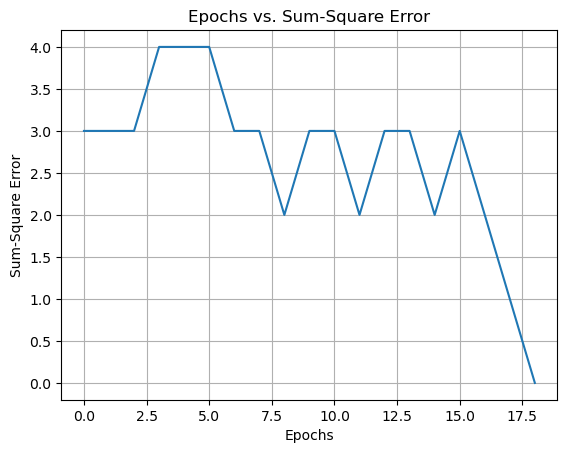

Final weights ==> w0: -1.5  w1: 1.2  w2: 0.75
Calculated Output: 0
Real Output: 0
Calculated Output: 0
Real Output: 0
Calculated Output: 0
Real Output: 0
Calculated Output: 1
Real Output: 1


In [7]:
#A1

# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 100 epochs
while epoch_count < 100:
    error = 0
    
    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0
        
        # Define a step function (you can replace this with the desired activation function)
        def step_function(x):
            return 1 if x >= 0 else 0
        
        # Calculate the predicted output using the step function
        predicted_output = step_function(weighted_sum)
        
        # Calculate the error
        e = row['result'] - predicted_output
        
        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']
        
        # Accumulate the error for this epoch
        error += e ** 2
    
    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)
    
    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break
    
    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = step_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


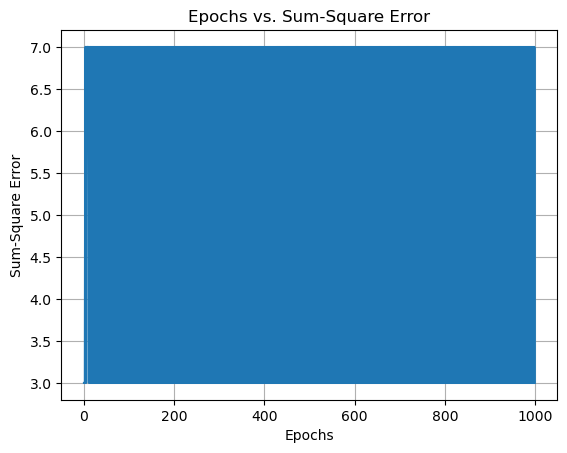

Final weights ==> w0: -1.0  w1: 1.2  w2: 1.25
Calculated Output: -1
Real Output: 0
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 1


In [8]:
#A2

#Bi-Polar Step function

# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0
    
    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0
        
        # Define a bipolar step function (you can replace this with the desired activation function)
        def bipolar_function(x):
            return -1 if x < 0 else 1
        
        # Calculate the predicted output using the bipolar step function
        predicted_output = bipolar_function(weighted_sum)
        
        # Calculate the error
        e = row['result'] - predicted_output
        
        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']
        
        # Accumulate the error for this epoch
        error += e ** 2
    
    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)
    
    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break
    
    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = bipolar_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


Converged after epoch count: 451


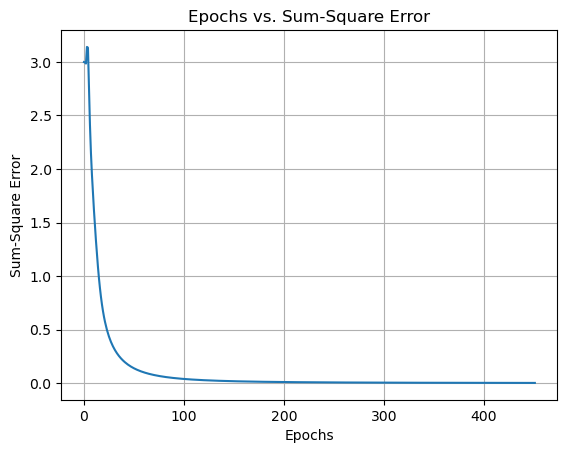

Final weights ==> w0: -11.01406446456043  w1: 7.251651917633865  w2: 7.237613596313013
Calculated Output: 1.646817326382425e-05
Real Output: 0
Calculated Output: 0.022390996364954657
Real Output: 0
Calculated Output: 0.022700359304807006
Real Output: 0
Calculated Output: 0.969973867639686
Real Output: 1


In [9]:
#Sigmoid function

# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0
    
    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0
        
        # Define a sigmoid function (you can replace this with the desired activation function)
        def sigmoid_function(x):
            return 1 / (1 + np.exp(-x))
        
        # Calculate the predicted output using the sigmoid function
        predicted_output = sigmoid_function(weighted_sum)
        
        # Calculate the error
        e = row['result'] - predicted_output
        
        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']
        
        # Accumulate the error for this epoch
        error += e ** 2
    
    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)
    
    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break
    
    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = sigmoid_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


Converged after epoch count: 20


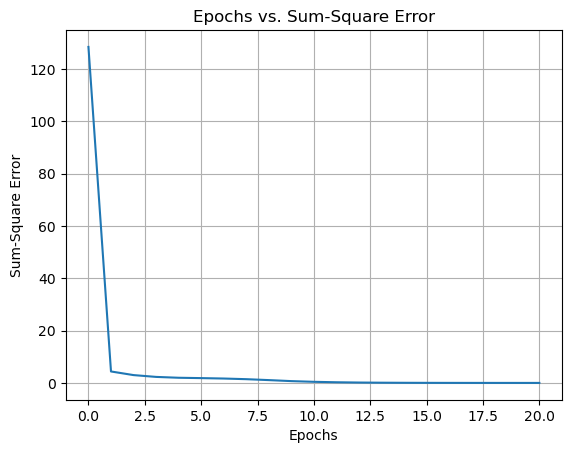

Final weights ==> w0: -0.9744791024733842  w1: 0.9999852734617888  w2: 0.9872469145057977
calculated output :  0
Real Output: 0
calculated output :  0.012767812032413506
Real Output: 0
calculated output :  0.025506170988404575
Real Output: 0
calculated output :  1.0127530854942024
Real Output: 1


In [10]:
#ReLU Function

# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0
    
    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0
        
        # Define a ReLU function (you can replace this with the desired activation function)
        def relu(x):
            return max(0, x)
        
        # Calculate the predicted output using the ReLU function
        predicted_output = relu(weighted_sum)
        
        # Calculate the error
        e = row['result'] - predicted_output
        
        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']
        
        # Accumulate the error for this epoch
        error += e ** 2
    
    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)
    
    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break
    
    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print real outputs
for index, row in and_table.iterrows():
    print("calculated output : ",relu(summation_unit(row['A'],row['B'],w0,w1,w2)))
    print("Real Output:", row['result'])